In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import os
import tensorflow as tf
from tensorflow import keras #keras sebagai deep learning untuk membangun CNN
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
for dirname, _, filenames in os.walk('C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\JTIKA-WordTemplate.docx
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Kel9_KECERDASAN BUATAN.ipynb
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Bacterial leaf blight\DSC_0365.JPG
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Bacterial leaf blight\DSC_0366.jpg
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Bacterial leaf blight\DSC_0367.JPG
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Bacterial leaf blight\DSC_0370.jpg
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Bacterial leaf blight\DSC_0372.JPG
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI\Bacterial leaf blight\DSC_0373.JPG
C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/K

In [3]:
data_dir = 'C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI'
data_dir

'C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/users/Nuel/Documents/SEMESTER 5 ILMU KOMPUTER UNIMED/KECERDASAN BUATAN/PROJECT AI')

In [5]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [6]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

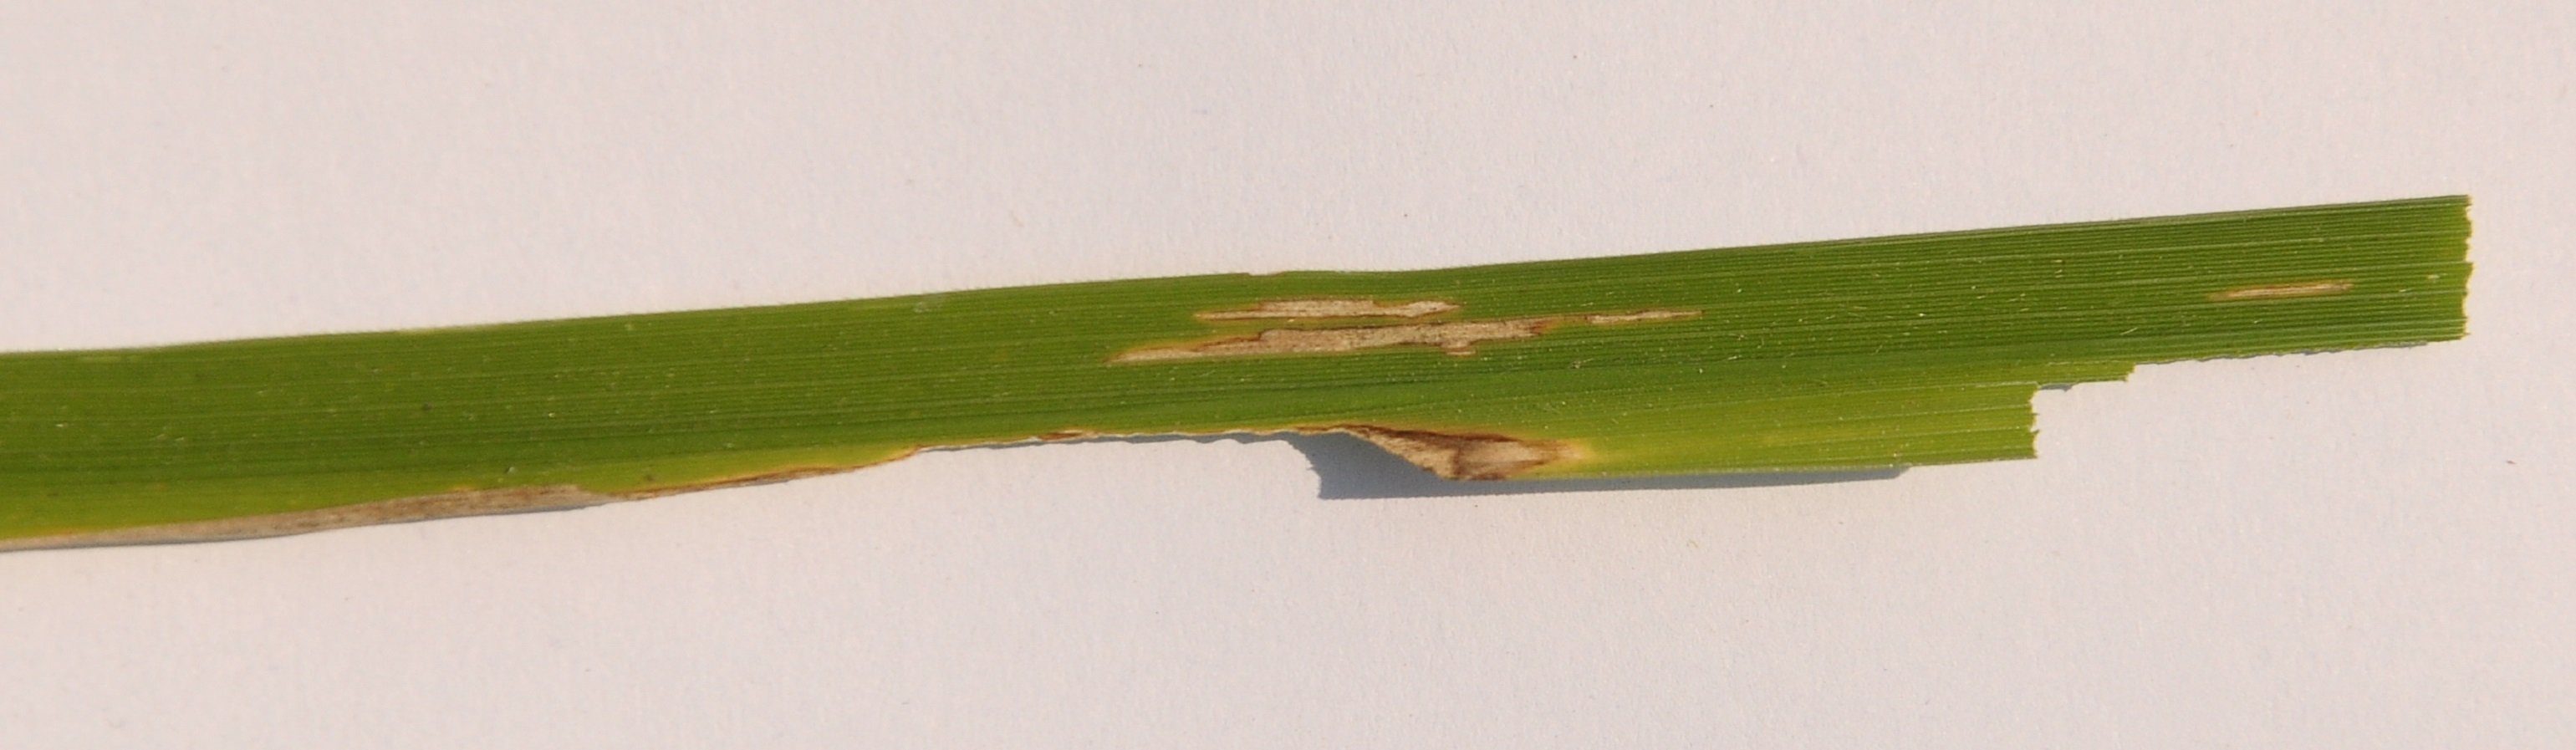

In [7]:
PIL.Image.open(str(bacteria[0]))

In [8]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [9]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),
"smut":list(data_dir.glob("Leaf smut/*"))}

In [10]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}

In [11]:
str(dict["smut"][0])

'C:\\users\\Nuel\\Documents\\SEMESTER 5 ILMU KOMPUTER UNIMED\\KECERDASAN BUATAN\\PROJECT AI\\Leaf smut\\DSC_0293.JPG'

In [12]:
img=cv2.imread(str((dict["smut"][0])))

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [15]:
y[:5]

[0, 0, 0, 0, 0]

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
len(X_test)

30

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 12s 3s/step - loss: 2.7922 - accuracy: 0.3000
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 1.1513 - accuracy: 0.3778
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 1.0158 - accuracy: 0.5111
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 0.9336 - accuracy: 0.6111
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 0.9215 - accuracy: 0.6111
Epoch 6/30
3/3 [==============================] - 9s 3s/step - loss: 0.8664 - accuracy: 0.6111
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 0.7610 - accuracy: 0.6778
Epoch 8/30
3/3 [==============================] - 9s 3s/step - loss: 0.6958 - accuracy: 0.7444
Epoch 9/30
3/3 [==============================] - 8s 3s/step - loss: 0.6426 - accuracy: 0.7556
Epoch 10/30
3/3 [==============================] - 8s 3s/step - loss: 0.5633 - accuracy: 0.7667
Epoch 11/30
3/3 [==============================]

In [22]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 3s 3s/step - loss: 2.0828 - accuracy: 0.7333


[2.0828239917755127, 0.7333333492279053]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

1/1 [==============================] - 3s 3s/step


array([[-21.826424  ,  14.940393  ,   0.21699424],
       [ -4.8608327 ,   2.3856113 ,   2.378101  ],
       [ -3.0883691 ,   0.866628  ,   3.1604698 ],
       [ 12.085713  ,  -5.0769725 ,  -6.9118557 ],
       [ -2.5167124 ,  -2.41017   ,   4.7407584 ],
       [  8.194976  ,   4.6278358 , -15.119249  ],
       [ 12.933065  ,  -2.6116056 , -10.673198  ],
       [ 13.220174  ,   2.0377152 , -15.311257  ],
       [  2.0288544 ,   6.406326  , -11.218165  ],
       [ -3.807362  ,   0.4041165 ,   3.9914715 ],
       [  3.7651212 ,   2.1105301 ,  -8.099856  ],
       [-26.136288  ,   1.367291  ,  16.632456  ],
       [  2.7717378 ,  -2.4431658 ,  -2.1504283 ],
       [  7.5934734 ,   1.7244583 , -11.737171  ],
       [ -4.8066587 ,  -7.4216833 ,   9.884609  ],
       [ -3.8654897 ,  -2.1118143 ,   6.9354415 ],
       [ 10.760052  ,  -1.1193074 ,  -9.027751  ],
       [-16.57254   ,   4.234784  ,   7.1886225 ],
       [ 10.741247  ,  -5.898061  ,  -7.7629046 ],
       [ -5.781677  ,   4.97047

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

In [27]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

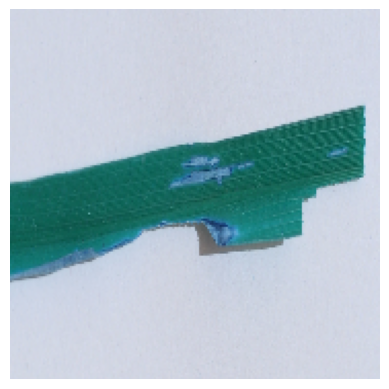

In [28]:
plt.axis('off')
plt.imshow(X[0])

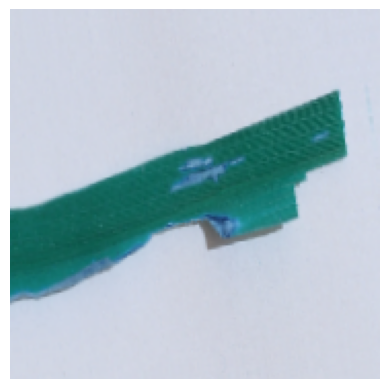

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 2s 2s/step - loss: 2.0828 - accuracy: 0.7333


[2.0828239917755127, 0.7333333492279053]